In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

C:\Users\Sanjana Singamsetty\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

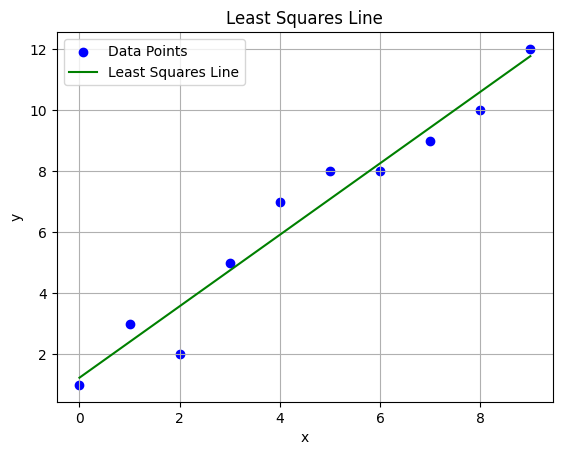

beta_0: 1.2363636363636363
beta_1: 1.1696969696969697


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate beta_1
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

# Calculate beta_0
beta_0 = y_mean - beta_1 * x_mean

# Least squares line equation: y = beta_0 + beta_1 * x

# Plot the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the least squares line
plt.plot(x, beta_0 + beta_1 * x, color='green', label='Least Squares Line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Line')
plt.legend()
plt.grid(True)
plt.show()

print("beta_0:", beta_0)
print("beta_1:", beta_1)


In [ ]:
# Predictions
y_pred = beta_0 + beta_1 * x

# Calculate SSE
SSE = np.sum((y - y_pred) ** 2)

# Calculate total sum of squares (SST)
SST = np.sum((y - y_mean) ** 2)

# Calculate R-squared
R_squared = 1 - (SSE / SST)

print("SSE:", SSE)
print("R-squared:", R_squared)
X=x


SSE: 5.624242424242423
R-squared: 0.952538038613988


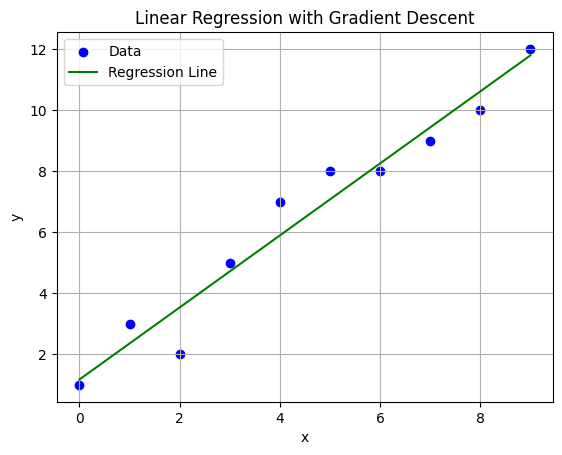

Final parameters (intercept, slope): [1.17878788 1.17878788]
Final cost: 0.2816919191919192


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Step 1: Initialize parameters
theta = np.zeros(2)  # [intercept, slope]

# Step 2: Define cost function
def cost_function(x, y, theta):
    m = len(y)
    y_pred = theta[0] + theta[1] * x
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

# Step 3: Implement gradient descent
def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        y_pred = theta[0] + theta[1] * x
        error = y_pred - y
        gradient = (1 / m) * np.dot(error, x)
        theta -= learning_rate * gradient
        costs.append(cost_function(x, y, theta))
    return theta, costs

# Step 4: Run gradient descent
learning_rate = 0.01
iterations = 1000
theta_final, costs = gradient_descent(x, y, theta, learning_rate, iterations)

# Plotting the data and regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, theta_final[0] + theta_final[1] * x, color='green', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Print the final parameters and cost
print("Final parameters (intercept, slope):", theta_final)
print("Final cost:", costs[-1])


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

housing_data = pd.read_csv("/content/housing (3).csv")

selected_attribute = 'median_income'
X = housing_data[selected_attribute].values.reshape(-1, 1)
y = housing_data['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

theta_analytic = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)
print("Coefficients using Analytic Formulation:", theta_analytic)

def full_batch_gradient_descent(X, y, learning_rate, num_iterations):
    theta = np.zeros(X.shape[1])
    for _ in range(num_iterations):
        y_pred = X.dot(theta)
        theta -= (1/len(y)) * learning_rate * X.T.dot(y_pred - y)
    return theta

learning_rate = 0.01
num_iterations = 1000
theta_full_batch = full_batch_gradient_descent(X_train_with_intercept, y_train, learning_rate, num_iterations)
print("Coefficients using Full-batch Gradient Descent:", theta_full_batch)

def stochastic_gradient_descent(X, y, learning_rate, num_iterations):
    theta = np.zeros(X.shape[1])
    m = len(y)  # Number of training examples

    # Shuffle the training data once before training
    shuffle_index = np.random.permutation(len(y))
    X_shuffled = X[shuffle_index]
    y_shuffled = y[shuffle_index]

    # SGD loop
    for _ in range(num_iterations):
        for xi, yi in zip(X_shuffled, y_shuffled):
            y_pred = np.dot(xi, theta)
            gradient = xi * (y_pred - yi)
            theta -= learning_rate * gradient

    return theta

theta_stochastic = stochastic_gradient_descent(X_train_with_intercept, y_train, learning_rate, num_iterations)
print("Coefficients using Stochastic Gradient Descent:", theta_stochastic)





Coefficients using Analytic Formulation: [44459.72916908 41933.84939381]
Coefficients using Full-batch Gradient Descent: [39148.47787113 43047.96802282]
Coefficients using Stochastic Gradient Descent: [48024.35837887 46377.45559966]


In [7]:
# Predictions
y_pred_analytic = X_test_with_intercept.dot(theta_analytic)
y_pred_full_batch = X_test_with_intercept.dot(theta_full_batch)
y_pred_stochastic = X_test_with_intercept.dot(theta_stochastic)

# Calculate SSE
SSE_analytic = np.sum((y_test - y_pred_analytic) ** 2)
SSE_full_batch = np.sum((y_test - y_pred_full_batch) ** 2)
SSE_stochastic = np.sum((y_test - y_pred_stochastic) ** 2)

# Calculate total sum of squares (SST)
mean_y = np.mean(y_test)
SST = np.sum((y_test - mean_y) ** 2)

# Calculate R-squared
R_squared_analytic = 1 - (SSE_analytic / SST)
R_squared_full_batch = 1 - (SSE_full_batch / SST)
R_squared_stochastic = 1 - (SSE_stochastic / SST)

print("SSE and R-squared value:")
print("Analytic Formulation: SSE =", SSE_analytic, ", R-squared =", R_squared_analytic)
print("Full-batch Gradient Descent: SSE =", SSE_full_batch, ", R-squared =", R_squared_full_batch)
print("Stochastic Gradient Descent: SSE =", SSE_stochastic, ", R-squared =", R_squared_stochastic)


SSE and R-squared value:
Analytic Formulation: SSE = 29272299281848.184 , R-squared = 0.4588591890384667
Full-batch Gradient Descent: SSE = 29321631561932.883 , R-squared = 0.4579472104543938
Stochastic Gradient Descent: SSE = 31330739398867.97 , R-squared = 0.42080594479159006
